# Conway Game of Life in a single line of Python

In [1]:
#!
from time import sleep
from ipywidgets import interact
import matplotlib.pyplot as plt
from IPython.display import clear_output

## Conway Game of life function

On [Wikipedia](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life), Conway's game of life is described as a 2D grid of cells for which:

1.  Any live cell with fewer than two live neighbours dies, as if by underpopulation.
1.  Any live cell with two or three live neighbours lives on to the next generation.
1.  Any live cell with more than three live neighbours dies, as if by overpopulation.
1.  Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

This is simple enough. Let's implement this in a single line of python. More specifically, we'll be able to represent the game as a single [generator expression](https://www.python.org/dev/peps/pep-0289/). This is possible since the introduction of the [Walrus Operator :=](https://www.python.org/dev/peps/pep-0572/). 


Anyway... Not sure why I did this:

In [6]:
game_of_life = lambda initial_cells, num_steps: (cells := (set(initial_cells) if i == 0 else (cells.difference({(x, y) for (x, y) in cells if not 1 < len([(x + i, y + j) for i in (-1, 0, 1) for j in (-1, 0, 1) if (not i == j == 0 and (x + i, y + j) in cells)]) < 4 }).union({(x_, y_) for (x, y) in cells for (x_, y_) in ((x + i, y + j) for i in (-1, 0, 1) for j in (-1, 0, 1) if (not i == j == 0 and (x + i, y + j) not in cells)) if len([(x_ + i, y_ + j) for i in (-1, 0, 1) for j in (-1, 0, 1) if (not i == j == 0 and (x_ + i, y_ + j) in cells)]) == 3 }))) for i in range(num_steps))

## Visualize

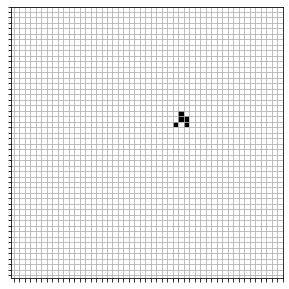

In [5]:
#!
X, Y = np.mgrid[0:50, 0:50]
grid = np.zeros_like(X, dtype=int)

initial_cells = {(2, 2), (2, 1), (2, 0), (1, 0), (0, 1)}
num_steps = 120
for cells in game_of_life(initial_cells, num_steps):
    clear_output(wait=True)
    grid[:, :] = 0
    for x, y in cells:
        grid[x, -y] = 1
    plt.figure(figsize=(5, 5))
    plt.axis('scaled')
    p = plt.pcolormesh(X, Y, grid, cmap="Greys")
    plt.xticks(X[:,0]+0.5, ["" for _ in X[:, 0]])
    plt.yticks(Y[0,:]+0.5, ["" for _ in Y[0, :]])
    plt.grid(True)
    plt.show()